In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import rasterio as rio
from rasterio.plot import reshape_as_image
import maskslic as seg
import skimage.segmentation as seg2


In [2]:
slic_dir = '/home/jp/Pictures/new_slic/'
output_dir = '/home/jp/Pictures/new_output/'
c2_matrix = '/home/jp/Downloads/AREA_3_mat.tif'

In [74]:
def rescale_img(src, w, h):
    data = src.read(
        out_shape=(
            src.count,
            w,
            h
        ),
        )

# scale image transform
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    return data

def test(filepath, n_segments, enforce_connectivity, distance, spatial_weight, filename='file', max_iter=10, compactness=0.1, color_image=None, w=None, h=None, mask=None):
    with rio.open(filepath) as src:
        if w and h:
            image = rescale_img(src, w, h)
        else:
            image = src.read()
        image = reshape_as_image(image)

        # if mask is not None:
        #     mask = rescale_img(rasterio.open('/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif'), image.shape[0], image.shape[1])
        #     mask = mask[1]

        # Remover valores iguais a 0 para evitar problemas
        zero_mask = (image == 0)
        random_numbers = np.random.rand(*image.shape)
        image[zero_mask] = random_numbers[zero_mask]
        print('antes do slic')
        print(type(max_iter))
        vv_slic = seg.slic(image, n_segments=n_segments, max_iter=max_iter, compactness=compactness, enforce_connectivity=True, distance=distance, spatial_weight=spatial_weight, mask=mask)
        print('antes do mark')
        if color_image is None:
            display_image = image[:, :, 2]/np.max(image[:, :, 2])
        else:
            display_image = color_image
        image_with_bounds = seg2.mark_boundaries(image=display_image, label_img=vv_slic)
        print('depois do mark')
        plt.imshow(image_with_bounds)
        plt.imsave(output_dir + filename +'.png', image_with_bounds)
        np.save(slic_dir +filename + '.npy', vv_slic)
        return vv_slic

In [4]:
color_image = '/home/jp/Documents/IME/TCC/NEW/areas_tif/AE-X03-8b_B7.tif'
color_src = rasterio.open(color_image)
color_img = color_src.read()
color_img = color_img.transpose(1, 2, 0)

In [6]:
color_img.shape

(998, 977, 1)

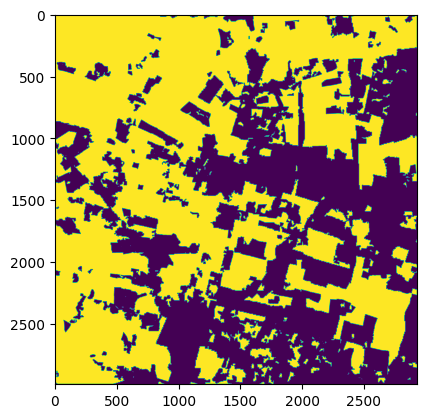

In [57]:
mascara = '/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif' 
mascara_src = rasterio.open(mascara)
mascara = mascara_src.read()
# m = mascara.transpose(1,2,0)
mask = mascara[1]
plt.imshow(mask)
mask[mask==255] = 1

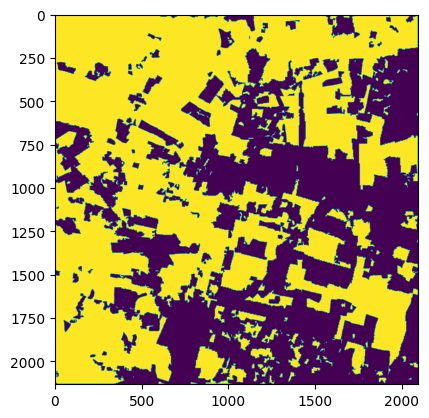

In [65]:
mascara = '/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif' 
mascara_src = rasterio.open(mascara)

mascara = '/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif' 
mascara_src = rasterio.open(mascara)

# m = mascara.transpose(1,2,0)


data = mascara_src.read(
    out_shape=(
        mascara_src.count,
        2132,
        2093
    ),
    )

# scale image transform
transform = mascara_src.transform * mascara_src.transform.scale(
    (mascara_src.width / data.shape[-1]),
    (mascara_src.height / data.shape[-2])
)

mask = data[1]
plt.imshow(mask)
mask[mask==255] = 1

In [66]:
mask.shape

(2132, 2093)

In [143]:
# classes_img = reshape_as_image(new_array)
classes_img = classes_img.transpose(2, 0, 1)
classes_img.shape

(2132, 2093, 1)

In [144]:
filename = 'wishart_mask_10000_classes'
slic = test(c2_matrix, 10000, False, 0, 5, filename, mask=mask, color_image=classes_img) 

antes do slic
<class 'int'>
DISTÂNCIA:
0
0
1
2
3
4
5
6
7
8
9
antes do mark


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (470816,1)

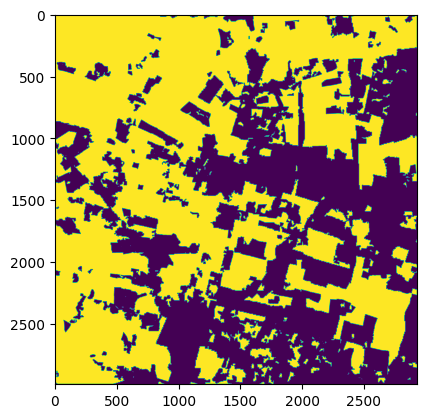

In [23]:
plt.imshow(mask)

In [59]:
mask.shape

(2990, 2928)

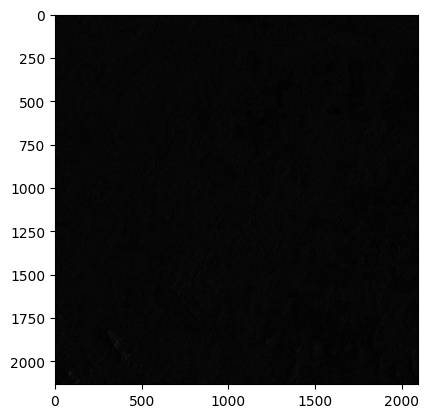

In [44]:
plt.imshow((image[:, :, 3]/np.max(image[:, :, 0:3]))*255, cmap='gray')

In [40]:
im = image[:, :, 3]/np.max(image[:, :, 3])

In [41]:
np.max(im)

1.0

In [25]:
with rio.open(c2_matrix) as src:
    image = src.read()
    image = reshape_as_image(image)
    image.shape

In [26]:
image.shape

(2132, 2093, 4)

In [27]:
mask.shape

(2990, 2928)

In [47]:
with rio.open('/home/jp/Pictures/teste.tif') as src:
    teste = src.read()
    teste = reshape_as_image(teste)
    teste.shape
plt.imshow(teste[3])

RasterioIOError: Read or write failed. /home/jp/Pictures/teste.tif, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedStrip() failed.

In [79]:
truth = np.load('/home/jp/Documents/IME/TCC/NEW/VALIDACAO/truth_x03.npy')
truth.shape

(998, 977, 1)

In [81]:
np.unique(truth)

array([1., 2., 3.], dtype=float32)

In [82]:
np.unique(mask)

array([0, 1], dtype=uint8)

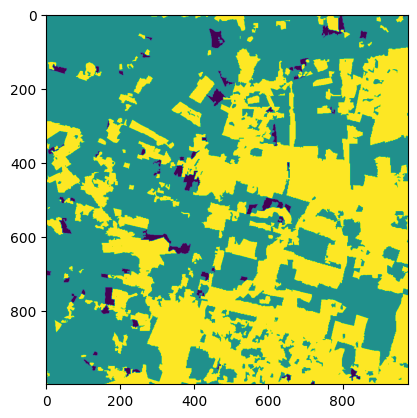

In [126]:
plt.imshow(truth[:,:,:])

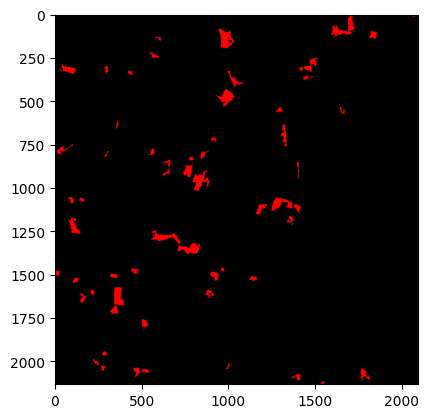

In [111]:
plt.imshow(reshape_as_image(data[:3, :, :]))

In [112]:
imagem = reshape_as_image(data[:3, :, :])
imagem

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [255,   0,   0],
        [  0,   1,   0],
        [  0,   0,   0]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [119]:
np.unique(imagem[:,:,0])

array([  0, 255], dtype=uint8)

In [120]:
imagem.shape

(2132, 2093, 3)

In [121]:
new_array = np.full((2132, 2093, 1), 3)

# Conditions for assigning values based on channels
# If channel 1 value is 255, assign 1; if channel 2 value is 1, assign 2; else, keep as 3
new_array[imagem[:, :, 0] == 255] = 1
new_array[imagem[:, :, 1] == 1] = 2

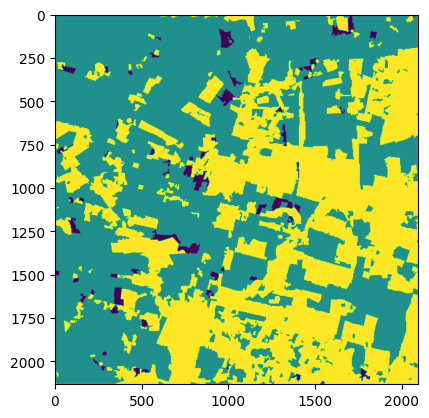

In [122]:
plt.imshow(new_array[:,:,0])

In [123]:
new_array.shape

(2132, 2093, 1)

In [125]:
np.save('/home/jp/Pictures/new_truth/ae03_truth.npy', new_array)

In [104]:
data[:3, :, :].shape

(3, 2132, 2093)

In [89]:
img = data.transpose(1, 2, 0)

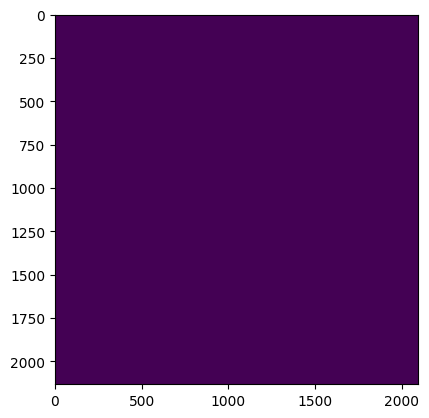

In [94]:
plt.imshow(img[:,:,2])

In [127]:
slic3 = np.load(slic_dir+'wishart_mask_10000.npy')
np.unique(slic3)

array([  -1,    0,    1,    3,    4,    5,    8,    9,   12,   13,   14,
         15,   16,   18,   19,   21,   22,   23,   24,   25,   27,   29,
         30,   31,   33,   39,   44,   45,   47,   52,   57,   58,   60,
         62,   63,   64,   65,   67,   68,   69,   71,   74,   76,   79,
         80,   83,   84,   85,   86,   88,   89,   91,   93,   94,   95,
         97,   98,   99,  103,  104,  107,  109,  112,  114,  115,  116,
        117,  119,  120,  121,  124,  127,  128,  132,  134,  136,  137,
        139,  141,  143,  145,  153,  154,  160,  164,  168,  170,  174,
        175,  176,  180,  181,  183,  184,  186,  189,  190,  193,  196,
        197,  198,  200,  202,  203,  204,  206,  207,  208,  209,  210,
        211,  212,  214,  215,  218,  221,  222,  225,  226,  227,  229,
        232,  234,  235,  236,  237,  238,  239,  240,  241,  242,  243,
        247,  250,  253,  255,  256,  259,  260,  262,  263,  264,  266,
        267,  268,  269,  271,  272,  273,  275,  2

In [128]:
np.std(slic3)

438.29912924723175

In [134]:
def calculate_statistics(segmentation):
    unique_classes, counts = np.unique(segmentation, return_counts=True)

    # pixel_counts = []

    # for cls in unique_classes:
    #     class_pixels = slic3 == cls
    #     num_pixels = np.sum(class_pixels)
    #     pixel_counts.append(num_pixels)

    std_dev = np.std(counts)
    mean = np.mean(counts)
    coeff = std_dev/mean

    return std_dev, mean, coeff

In [135]:
a, b, c = calculate_statistics(slic3)

In [138]:
c

21.40370217501415

In [132]:
np.mean(pixel_counts)

4609.789256198347

In [130]:
std_dev

98666.55632924942

In [133]:
# desvio padrão normalizado
4609.789256198347/98666.55632924942

0.046720889303316936

In [131]:
pixel_counts

[3062185,
 254590,
 1417,
 4012,
 1190,
 1780,
 515,
 413,
 746,
 926,
 956,
 5227,
 2566,
 1168,
 1163,
 1488,
 652,
 1037,
 1678,
 3461,
 680,
 1688,
 806,
 940,
 961,
 615,
 9293,
 441,
 856,
 2583,
 568,
 2311,
 261,
 1240,
 2321,
 1258,
 1154,
 1541,
 553,
 1611,
 501,
 1518,
 1610,
 900,
 1650,
 1387,
 1453,
 2511,
 1026,
 661,
 1261,
 973,
 875,
 1165,
 1479,
 1274,
 1106,
 766,
 9706,
 2242,
 240,
 386,
 5921,
 1181,
 1081,
 1214,
 496,
 1078,
 1333,
 921,
 753,
 945,
 437,
 1361,
 1214,
 1405,
 420,
 943,
 756,
 321,
 541,
 2336,
 1039,
 1132,
 1312,
 298,
 1133,
 547,
 1933,
 1527,
 463,
 356,
 1187,
 1577,
 1796,
 1294,
 1064,
 1344,
 714,
 908,
 280,
 1391,
 359,
 1487,
 903,
 1139,
 4917,
 670,
 2235,
 3289,
 247,
 2290,
 1379,
 1214,
 1249,
 3760,
 629,
 1172,
 1019,
 917,
 726,
 1178,
 623,
 1667,
 1095,
 587,
 350,
 3249,
 2426,
 3311,
 4869,
 683,
 502,
 814,
 3098,
 1488,
 876,
 793,
 1546,
 1776,
 509,
 1211,
 1037,
 888,
 1001,
 1637,
 1090,
 1096,
 1094,
 837,
 105